In [1]:
!pip install mne

In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt


In [2]:
# 定义BDF文件的路径
bdf_file_path = '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf'

# 使用mne.io.read_raw_bdf函数读取BDF文件
raw = mne.io.read_raw_bdf(bdf_file_path, preload=True)



Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 103423  =      0.000 ...   201.998 secs...


In [3]:
# 打印EEG数据的基本信息
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2011-06-03 11:42:21 UTC
 nchan: 41
 projs: []
 sfreq: 512.0 Hz
>


In [8]:
%matplotlib widget

Effective window size : 4.000 (s)


Using matplotlib as 2D backend.


/var/folders/8h/6kht9rs15kd0_jl_jwkk7kfr0000gn/T/ipykernel_2807/510723517.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
/Users/mac/opt/anaconda3/envs/tf24/lib/python3.8/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


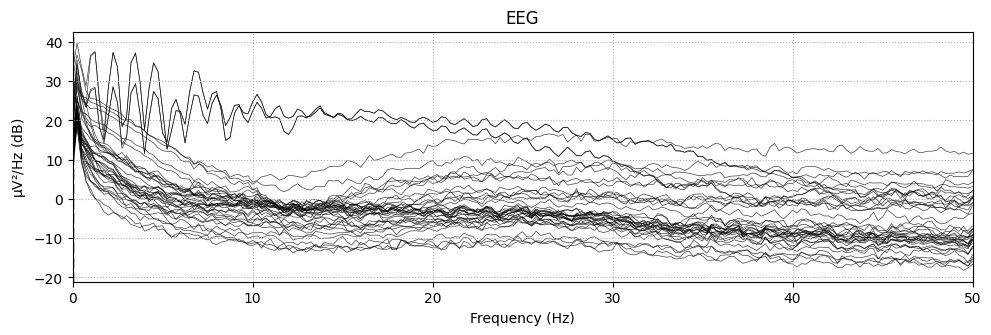

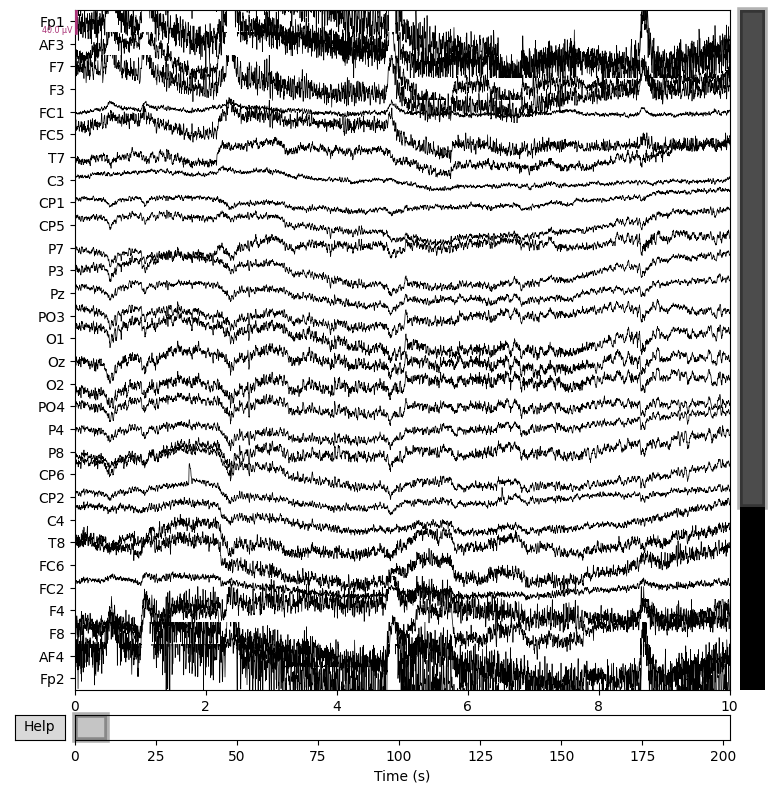

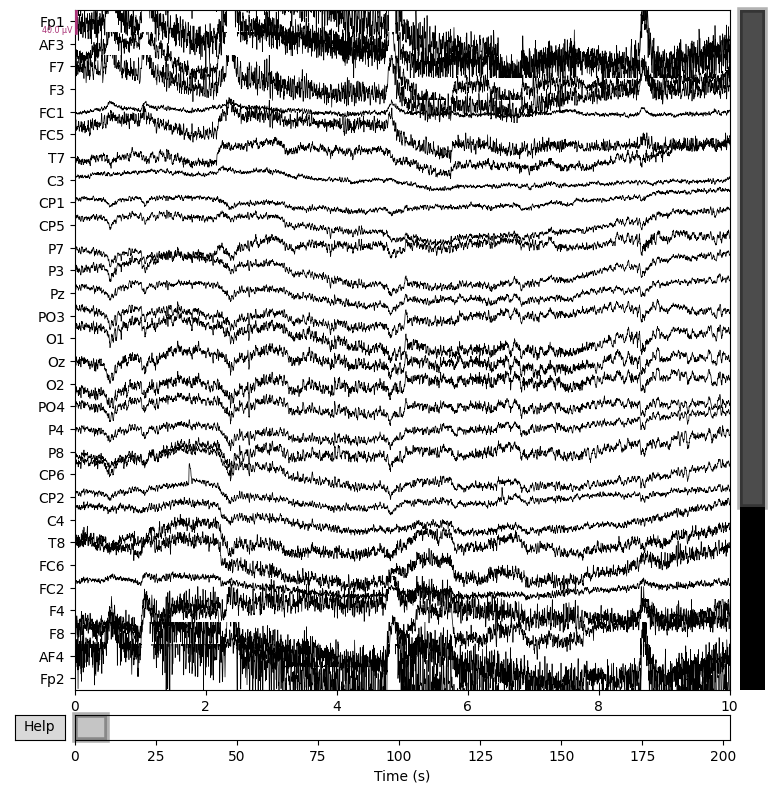

In [4]:
# 可以进一步进行数据分析和可视化
# 例如，绘制第一个通道的EEG数据
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
raw.plot(duration=10, n_channels=30)

In [6]:
info = raw.info

In [7]:
print(info.keys())

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])


In [2]:
import os
# 定义文件夹路径
folder_path = '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset'
# 获取文件夹中的所有文件名
file_names = os.listdir(folder_path)
bdf_hc_files = []

# 获取文件夹中所有子文件夹的列表
sub_folders = os.listdir(folder_path)
# 遍历每个子文件夹
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(folder_path, sub_folder, 'ses-hc', 'eeg')#bdf文件的字文件夹路径
    # 判断路径是否存在
    if os.path.exists(sub_folder_path):
        file_names = os.listdir(sub_folder_path)
        for file in file_names:
            if file.lower().endswith('bdf'):
                bdf_file_path = os.path.join(sub_folder_path, file)#bdf文件的完整路径
                bdf_hc_files.append(bdf_file_path)

In [3]:
bdf_hc_files #标记为健康人的EGG数据集

['/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc24/ses-hc/eeg/sub-hc24_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc30/ses-hc/eeg/sub-hc30_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc31/ses-hc/eeg/sub-hc31_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc1/ses-hc/eeg/sub-hc1_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf',
 '

In [26]:
import mne
import pandas as pd 
import matplotlib.pyplot as plt

In [27]:
#创建一个空的 dataFrame
eeg_hc_data_df = pd.DataFrame()

In [119]:
idx = 0
# 使用MNE库读取每个BDF文件
for bdf_file in bdf_hc_files:
    #bdf_file_path = os.path.join(folder_path, bdf_file)
    raw = mne.io.read_raw_bdf(bdf_file, preload=True)
 
    # 获取EEG数据并创建DataFrame
    eeg_data = pd.DataFrame(raw.get_data().T, columns=raw.ch_names)
    eeg_data = eeg_data.iloc[:, 0: 39] # 去掉没啥用的stimu通道
    # 添加样本标识列
    eeg_data['sample_id'] = idx
    #添加标签列
    eeg_data['label']  = 'HC'
    #用一个df来记录每一个bdf文件的数据，制作数据集，最后生成一个csv文件，用来深度学习
    eeg_hc_data_df = pd.concat([eeg_hc_data_df, eeg_data])
    idx += 1

    # 打印一些信息
    print(f"Processed {bdf_file}")

print("All BDF files processed.")

Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 92671  =      0.000 ...   180.998 secs...
Processed /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf
Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99327  =      0.000 ...   193.998 secs...
Processed /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf
Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.inf

In [120]:
raw.info


<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2011-06-29 10:50:25 UTC
 nchan: 41
 projs: []
 sfreq: 512.0 Hz
>

## 处理PD_ON(ON medication)数据，生成eeg_pd_data.csv

In [5]:
import os
# 定义文件夹路径
folder_path = '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset'
# 获取文件夹中的所有文件名
file_names = os.listdir(folder_path)
bdf_pd_files = []

# 获取文件夹中所有子文件夹的列表
sub_folders = os.listdir(folder_path)
# 遍历每个子文件夹
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(folder_path, sub_folder, 'ses-on', 'eeg')#on medications时的bdf文件的字文件夹路径
    # 判断路径是否存在
    if os.path.exists(sub_folder_path):
        file_names = os.listdir(sub_folder_path)
        for file in file_names:
            if file.lower().endswith('bdf'):
                bdf_file_path = os.path.join(sub_folder_path, file)#bdf文件的完整路径
                bdf_pd_files.append(bdf_file_path)

In [6]:
import pandas as pd
import numpy as np

# 创建一个空DataFrame，用于存储数据
eeg_pd_data_df = pd.DataFrame(columns=['label', 'data'])

# 使用MNE库读取每个BDF文件
for bdf_file in bdf_pd_files:
    raw = mne.io.read_raw_bdf(bdf_file, preload=True)
    
    # 获取EEG数据并创建DataFrame
    eeg_data = pd.DataFrame(raw.get_data().T, columns=raw.ch_names)
    eeg_data = eeg_data.iloc[:, 0: 39]  # 去掉没用的stimu通道
    eeg_data = eeg_data.T
    
    # 将数据添加到DataFrame中
    new_row = {'label': 'PD', 'data': eeg_data.values.tolist()}
    eeg_pd_data_df = eeg_pd_data_df.append(new_row, ignore_index=True)

    # 打印一些信息
    print(f"Processed {bdf_file}")



Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd3/ses-on/eeg/sub-pd3_ses-on_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 109055  =      0.000 ...   212.998 secs...
Processed /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd3/ses-on/eeg/sub-pd3_ses-on_task-rest_eeg.bdf
Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd5/ses-on/eeg/sub-pd5_ses-on_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105471  =      0.000 ...   205.998 secs...
Processed /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd5/ses-on/eeg/sub-pd5_ses-on_task-rest_eeg.bdf
Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd23/ses-on/eeg/sub-pd23_ses-on_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.i

In [28]:
# 保存为CSV文件
csv_filename = 'eeg_pd_data.csv'
eeg_pd_data_df.to_csv(csv_filename, index=False)

print(f"Data saved to {csv_filename}")


Data saved to eeg_pd_data.csv


In [50]:
import json

# 将 eeg_pd_data_list 转换为 DataFrame
#eeg_pd_data_df = pd.DataFrame(eeg_pd_data_list, columns=['label', 'data'])

# 保存为 JSON 文件
json_filename = 'eeg_pd_data.json'
eeg_pd_data_df.to_json(json_filename, orient='records')

print(f"Data saved to {json_filename}")


Data saved to eeg_pd_data.json


In [33]:
eeg_pd_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   15 non-null     object
 1   data    15 non-null     object
dtypes: object(2)
memory usage: 368.0+ bytes


In [34]:
len(eeg_pd_data_df['data'].iloc[0])

39

In [51]:
# 从 JSON 文件加载数据
eeg_pd_data_df_reload = pd.read_json(json_filename, orient='records')

# 重新加载后的列数据是嵌套列表
print(len(eeg_pd_data_df_reload['data'].iloc[0]))  # 输出正确的长度


39


In [52]:
eeg_pd_data_df_reload.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   15 non-null     object
 1   data    15 non-null     object
dtypes: object(2)
memory usage: 368.0+ bytes


In [53]:
len(eeg_pd_data_df['data'].iloc[0][0])

109056

In [55]:
len(eeg_pd_data_df_reload['data'].iloc[0][0])

109056

In [57]:
len(eeg_pd_data_df_reload['data'].iloc[0][0]) / 512 

213.0

In [8]:
len(eeg_pd_data_df['data'].iloc[0][0]) / 512

213.0

## 处理HC数据，生成CSV 

In [61]:
import os
# 定义文件夹路径
folder_path = '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset'
# 获取文件夹中的所有文件名
file_names = os.listdir(folder_path)
bdf_hc_files = []

# 获取文件夹中所有子文件夹的列表
sub_folders = os.listdir(folder_path)
# 遍历每个子文件夹
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(folder_path, sub_folder, 'ses-hc', 'eeg')#bdf文件的字文件夹路径
    # 判断路径是否存在
    if os.path.exists(sub_folder_path):
        file_names = os.listdir(sub_folder_path)
        for file in file_names:
            if file.lower().endswith('bdf'):
                bdf_file_path = os.path.join(sub_folder_path, file)#bdf文件的完整路径
                bdf_hc_files.append(bdf_file_path)

In [62]:
# 创建一个空DataFrame，用于存储数据
eeg_hc_data_df = pd.DataFrame(columns=['label', 'data'])

# 使用MNE库读取每个BDF文件
for bdf_file in bdf_hc_files:
    raw = mne.io.read_raw_bdf(bdf_file, preload=True)
    
    # 获取EEG数据并创建DataFrame
    eeg_data = pd.DataFrame(raw.get_data().T, columns=raw.ch_names)
    eeg_data = eeg_data.iloc[:, 0: 39]  # 去掉没用的stimu通道
    eeg_data = eeg_data.T
    
    # 将标签和数据添加到DataFrame中
    new_row = {'label': 'HC', 'data': eeg_data.values.tolist()}
    eeg_hc_data_df = eeg_hc_data_df.append(new_row, ignore_index=True)

    # 打印一些信息
    print(f"Processed {bdf_file}")




Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 92671  =      0.000 ...   180.998 secs...
Processed /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf
Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99327  =      0.000 ...   193.998 secs...
Processed /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf
Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.inf

In [63]:
# 保存为 JSON 文件
json_filename = 'eeg_hc_data.json'
eeg_hc_data_df.to_json(json_filename, orient='records')

print(f"Data saved to {json_filename}")


Data saved to eeg_hc_data.json


In [65]:
# 从 JSON 文件加载数据
eeg_hc_data_df_reload = pd.read_json(json_filename, orient='records')
# 重新加载后的列数据是嵌套列表
print(len(eeg_hc_data_df_reload['data'].iloc[0]))  # 输出正确的长度

39


In [64]:
eeg_hc_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   16 non-null     object
 1   data    16 non-null     object
dtypes: object(2)
memory usage: 384.0+ bytes


In [66]:
len(eeg_hc_data_df_reload['data'].iloc[0][0]) / 512

181.0

In [251]:
eeg_hc_data_df.head()

,label,data
0,HC,"[[-0.013113303895849221, -0.013115491391807281..."
1,HC,"[[-0.015383924700315278, -0.01537923720897658,..."
2,HC,"[[-0.00849309368283115, -0.008506906157309183,..."
3,HC,"[[-0.0012573258027032495, -0.00124935706742746..."
4,HC,"[[0.00030051506880015547, 0.000309108802921104..."


## 处理PD_OFF数据(OFF medication)

In [67]:
import os
# 定义文件夹路径
folder_path = '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset'
# 获取文件夹中的所有文件名
file_names = os.listdir(folder_path)
bdf_pd_off_files = []

# 获取文件夹中所有子文件夹的列表
sub_folders = os.listdir(folder_path)
# 遍历每个子文件夹
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(folder_path, sub_folder, 'ses-off', 'eeg')#on medications时的bdf文件的字文件夹路径
    # 判断路径是否存在
    if os.path.exists(sub_folder_path):
        file_names = os.listdir(sub_folder_path)
        for file in file_names:
            if file.lower().endswith('bdf'):
                bdf_file_path = os.path.join(sub_folder_path, file)#bdf文件的完整路径
                bdf_pd_off_files.append(bdf_file_path)
                

In [38]:
bdf_pd_off_files

['/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd3/ses-off/eeg/sub-pd3_ses-off_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd5/ses-off/eeg/sub-pd5_ses-off_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd23/ses-off/eeg/sub-pd23_ses-off_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd12/ses-off/eeg/sub-pd12_ses-off_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd13/ses-off/eeg/sub-pd13_ses-off_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd14/ses-off/eeg/sub-pd14_ses-off_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd22/ses-off/eeg/sub-pd22_ses-off_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd9/ses-off/eeg/sub-pd9_ses-off_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd6/ses-off/eeg/sub-pd6_ses-off_ta

In [21]:
import pandas as pd
import numpy as np
import mne


In [91]:
# 创建一个空DataFrame，用于存储数据
eeg_pd_off_data_df = pd.DataFrame(columns=['label', 'data'])

# 使用MNE库读取每个BDF文件

for bdf_file in bdf_pd_off_files:
    
    raw = mne.io.read_raw_bdf(bdf_file, preload=True)
    # 获取EEG数据并创建DataFrame
    eeg_data = pd.DataFrame(raw.get_data().T, columns=raw.ch_names)
    eeg_data = eeg_data.iloc[:, 0: 39]  # 去掉没用的stimu通道
    eeg_data = eeg_data.T
    
    # 将数据添加到DataFrame中
    new_row = {'label': 'PD_off', 'data': eeg_data.values.tolist()}
    eeg_pd_off_data_df = eeg_pd_off_data_df.append(new_row, ignore_index=True)

    # 打印一些信息
    print(f"Processed {bdf_file}")



Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd3/ses-off/eeg/sub-pd3_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102399  =      0.000 ...   199.998 secs...
Processed /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd3/ses-off/eeg/sub-pd3_ses-off_task-rest_eeg.bdf
Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd5/ses-off/eeg/sub-pd5_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 100863  =      0.000 ...   196.998 secs...
Processed /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd5/ses-off/eeg/sub-pd5_ses-off_task-rest_eeg.bdf
Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd23/ses-off/eeg/sub-pd23_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Crea

In [97]:
eeg_data.shape

(39, 97792)

In [98]:
# 创建一个空DataFrame，用于存储数据
eeg_pd_off_data_df = pd.DataFrame(columns=['label', 'data'])

# 使用MNE库读取每个BDF文件
for bdf_file in bdf_pd_off_files:
    raw = mne.io.read_raw_bdf(bdf_file, preload=True)
    
    # 获取EEG数据并创建DataFrame
    eeg_data = pd.DataFrame(raw.get_data().T, columns=raw.ch_names)
    eeg_data = eeg_data.iloc[:, 0: 39]  # 去掉没用的stimu通道
    eeg_data = eeg_data.T
    
    # 将数据添加到DataFrame中
    new_row = {'label': 'PD_off', 'data': eeg_data.iloc[:, :45000].values.tolist()}
    eeg_pd_off_data_df = eeg_pd_off_data_df.append(new_row, ignore_index=True)
    
    new_row = {'label': 'PD_off', 'data': eeg_data.iloc[:, 45000:].values.tolist()}
    eeg_pd_off_data_df = eeg_pd_off_data_df.append(new_row, ignore_index=True)

    # 打印一些信息
    print(f"Processed {bdf_file}")


Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd3/ses-off/eeg/sub-pd3_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102399  =      0.000 ...   199.998 secs...
Processed /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd3/ses-off/eeg/sub-pd3_ses-off_task-rest_eeg.bdf
Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd5/ses-off/eeg/sub-pd5_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 100863  =      0.000 ...   196.998 secs...
Processed /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd5/ses-off/eeg/sub-pd5_ses-off_task-rest_eeg.bdf
Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-pd23/ses-off/eeg/sub-pd23_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Crea

In [102]:
len(eeg_pd_off_data_df['data'].iloc[0][1])

45000

In [69]:
# # 保存为CSV文件
# csv_filename = 'eeg_pd_off_data.csv'
# eeg_pd_off_data_df.to_csv(csv_filename, index=False)
# print(f"Data saved to {csv_filename}")

# 保存为 JSON 文件
json_filename = 'eeg_pd_off_data.json'
eeg_pd_off_data_df.to_json(json_filename, orient='records')

print(f"Data saved to {json_filename}")

Data saved to eeg_pd_off_data.json


In [71]:
# 从 JSON 文件加载数据
eeg_pd_off_data_df_reload = pd.read_json(json_filename, orient='records')

# 重新加载后的列数据是嵌套列表
print(len(eeg_pd_off_data_df_reload['data'].iloc[0]))  # 输出正确的长度

39


In [70]:
eeg_pd_off_data_df.head()

,label,data
0,PD_off,"[[-0.003181540997239411, -0.003181728496892958..."
1,PD_off,"[[-0.009000998994350373, -0.009002248992040694..."
2,PD_off,"[[0.0012228883644871927, 0.0012223258655265489..."
3,PD_off,"[[-0.0038543835039963428, -0.00385353975555537..."
4,PD_off,"[[-0.015056706554931791, -0.015055675306837277..."


In [24]:
len(eeg_pd_off_data_df['data'].iloc[0][0]) / 512

200.0

## 将所有的数据合并

In [60]:
# 保存全部数据为CSV文件
eeg_hc_data_df.append(eeg_pd_data_df,ignore_index=True)# ignore_index true,  接到PD时index会接着从16开始，而不是0

,label,data
0,HC,"[[-0.013113303895849221, -0.013115491391807281..."
1,HC,"[[-0.015383924700315278, -0.01537923720897658,..."
2,HC,"[[-0.00849309368283115, -0.008506906157309183,..."
3,HC,"[[-0.0012573258027032495, -0.00124935706742746..."
4,HC,"[[0.00030051506880015547, 0.000309108802921104..."
5,HC,"[[0.0012547945555326078, 0.0012552320547242197..."
6,HC,"[[-0.009677841493716328, -0.009671435255553439..."
7,HC,"[[-0.01855901258355454, -0.018558575084362927,..."
8,HC,"[[-0.0025936983334242302, -0.00258585459791747..."
9,HC,"[[-0.001264607039249363, -0.001270200778913544..."


In [25]:
pd.concat([eeg_pd_off_data_df, eeg_pd_data_df], ignore_index = True)

,label,data
0,PD_off,"[[-0.003181540997239411, -0.003181728496892958..."
1,PD_off,"[[-0.009000998994350373, -0.009002248992040694..."
2,PD_off,"[[0.0012228883644871927, 0.0012223258655265489..."
3,PD_off,"[[-0.0038543835039963428, -0.00385353975555537..."
4,PD_off,"[[-0.015056706554931791, -0.015055675306837277..."
5,PD_off,"[[0.010159903101140445, 0.010169059334222038, ..."
6,PD_off,"[[-0.008089813177991697, -0.008084781937288161..."
7,PD_off,"[[-0.01554333065577332, -0.015545455651846864,..."
8,PD_off,"[[0.005003881378166757, 0.005008662619332231, ..."
9,PD_off,"[[-0.02039750918647702, -0.020399852932146363,..."


In [26]:
combined_one = pd.concat([eeg_pd_off_data_df, eeg_pd_data_df], ignore_index = True)

In [32]:
len(combined_one) 

30

In [72]:
combined_two = pd.concat([eeg_hc_data_df, eeg_pd_data_df, eeg_pd_off_data_df], ignore_index = True)


In [73]:
len(combined_two['data'][0][0]) / 512

181.0

In [74]:
combined_df = combined_two

In [42]:
combined_df


,label,data
0,HC,"[[-0.013113303895849221, -0.013115491391807281..."
1,HC,"[[-0.015383924700315278, -0.01537923720897658,..."
2,HC,"[[-0.00849309368283115, -0.008506906157309183,..."
3,HC,"[[-0.0012573258027032495, -0.00124935706742746..."
4,HC,"[[0.00030051506880015547, 0.000309108802921104..."
5,HC,"[[0.0012547945555326078, 0.0012552320547242197..."
6,HC,"[[-0.009677841493716328, -0.009671435255553439..."
7,HC,"[[-0.01855901258355454, -0.018558575084362927,..."
8,HC,"[[-0.0025936983334242302, -0.00258585459791747..."
9,HC,"[[-0.001264607039249363, -0.001270200778913544..."


In [75]:
# csv_filename = 'eeg_data.csv'
# combined_df.to_csv(csv_filename, index=False)
# print(f"Data saved to {csv_filename}")

# 保存为 JSON 文件
json_filename = 'eeg_data.json'
combined_df.to_json(json_filename, orient='records')

print(f"Data saved to {json_filename}")

Data saved to eeg_data.json


In [77]:
# 从 JSON 文件加载数据
eeg_data_df_reload = pd.read_json(json_filename, orient='records')

# 重新加载后的列数据是嵌套列表
print(len(eeg_data_df_reload['data'].iloc[0]))  # 输出正确的长度


39


In [78]:
len(eeg_hc_data_df_reload['data'].iloc[0][0]) / 512 

181.0

In [79]:
eeg_hc_data_df_reload = 0
eeg_data_df_reload = 0
eeg_pd_off_data_df_reload = 0
eeg_hc_data_df_reload = 0

In [50]:
combined_df['data'].iloc[0]

[[-0.013113303895849221,
  -0.013115491391807281,
  -0.013111741398736321,
  -0.013109241403355681,
  -0.013104397662305693,
  -0.013100178920100862,
  -0.013099866420678282,
  -0.013104272662536661,
  -0.013112522647292771,
  -0.013118803885686628,
  -0.013121741380258881,
  -0.013122178879450493,
  -0.0131214288808363,
  -0.013118741385802112,
  -0.0131130226463689,
  -0.013109241403355681,
  -0.013109803902316326,
  -0.013111491399198257,
  -0.013114678893308572,
  -0.013117647637823082,
  -0.013121553880605333,
  -0.01312936636616983,
  -0.01313346010860563,
  -0.013127616369403383,
  -0.013119616384185337,
  -0.01311596014094115,
  -0.013118553886148566,
  -0.013124741374715648,
  -0.013126491371482096,
  -0.013129460115996605,
  -0.013127241370096287,
  -0.013120178883145981,
  -0.01311705388892018,
  -0.013116647639670827,
  -0.01312111638141372,
  -0.013124678874831132,
  -0.013124585125004357,
  -0.013121241381182753,
  -0.013116491389959538,
  -0.013112585147177287,
  -0.0131

## 读取保存的文件

In [1]:
import pandas as pd
# 指定保存的CSV文件名
csv_filename = 'eeg_data.json'
# 从 JSON 文件加载数据
eeg_data= pd.read_json(json_filename, orient='records')
# 重新加载后的列数据是嵌套列表
print(len(eeg_pd_data_df_reload['data'].iloc[0]))  # 输出正确的长度

  label                                               data
0    HC  [[-0.013113303895849221, -0.013115491391807281...
1    HC  [[-0.015383924700315278, -0.01537923720897658,...
2    HC  [[-0.00849309368283115, -0.008506906157309183,...
3    HC  [[-0.0012573258027032495, -0.00124935706742746...
4    HC  [[0.00030051506880015547, 0.000309108802921104...


In [4]:
combined_df = pd.read_csv(csv_filename)
# 打印前几行数据查看
print(combined_df.head())

  label                                               data
0    HC  [[-0.013113303895849221, -0.013115491391807281...
1    HC  [[-0.015383924700315278, -0.01537923720897658,...
2    HC  [[-0.00849309368283115, -0.008506906157309183,...
3    HC  [[-0.0012573258027032495, -0.00124935706742746...
4    HC  [[0.00030051506880015547, 0.000309108802921104...


In [85]:
testing = combined_df.iloc[0][1]

In [7]:
combined_df['data'].iloc[0][0]

'['

In [88]:
testing = np.array(testing)

In [90]:
testing.shape

(39, 92672)